In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.metrics import f1_score, roc_auc_score, mean_squared_error, mean_absolute_error

In [2]:
# Loading the dataset into dataframe
Features = pd.read_csv("csvs/Full_features.csv")
Target = pd.read_csv("csvs/DBP_SBP.csv")

In [3]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140816 entries, 0 to 140815
Data columns (total 64 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1       140816 non-null  float64
 1   2       140816 non-null  float64
 2   3       140816 non-null  float64
 3   4       140816 non-null  int64  
 4   5       140816 non-null  float64
 5   6       140816 non-null  float64
 6   7       140816 non-null  float64
 7   8       140816 non-null  float64
 8   9       140816 non-null  float64
 9   10      140816 non-null  float64
 10  11      140816 non-null  float64
 11  12      140816 non-null  float64
 12  13      140816 non-null  float64
 13  14      140816 non-null  float64
 14  15      140816 non-null  float64
 15  16      140816 non-null  float64
 16  17      140816 non-null  float64
 17  18      140816 non-null  float64
 18  19      140816 non-null  float64
 19  20      140816 non-null  float64
 20  21      140816 non-null  float64
 21  22      14

In [4]:
Features["25"].describe()

count     140738
unique      3725
top            0
freq       10165
Name: 25, dtype: object

In [5]:
Target

,DBP,SBP
0,67.307176,124.601310
1,65.597632,120.986846
2,67.062955,122.745234
3,68.088681,125.187439
4,68.723655,124.112869
...,...,...
140811,64.229997,108.726976
140812,60.859754,103.500657
140813,84.842209,120.107652
140814,57.440667,106.724368


In [6]:
Features

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,2.917889,2.890518,1.152493,1,0.990620,0.009380,0.394975,0.595645,0.368,0.240,...,2.086334,2.468231,2.829326,2.877419,1.637341,1.864743,0.601830,0.362200,1.864743,233.092864
1,2.808407,2.730205,1.121212,1,0.972155,0.027845,0.399234,0.572920,0.368,0.240,...,1.940450,2.294233,2.690127,2.733333,1.581623,1.773388,0.565174,0.319422,1.773388,221.673509
2,2.989247,2.869990,1.142717,1,0.960105,0.039895,0.382276,0.577829,0.336,0.208,...,2.049306,2.418377,2.841838,2.907527,1.627566,1.861474,0.609525,0.371521,1.861474,232.684262
3,2.990225,2.894428,1.159335,1,0.967963,0.032037,0.387708,0.580255,0.280,0.152,...,2.089619,2.481916,2.854350,2.906940,1.642229,1.874628,0.619411,0.383670,1.874628,234.328446
4,2.772239,2.722385,1.031281,1,0.982017,0.017983,0.372003,0.610014,0.248,0.120,...,1.894115,2.258065,2.671945,2.716325,1.499511,1.718850,0.582576,0.339395,1.718850,214.856305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140811,2.884653,2.042033,1.029326,1,0.707896,0.292104,0.356828,0.351067,0.416,0.216,...,1.954565,2.174976,2.723363,2.837928,1.551320,1.748113,0.586742,0.344266,1.748113,218.514174
140812,3.039101,2.533724,1.540567,1,0.833709,0.166291,0.506915,0.326793,0.208,0.480,...,2.322346,2.471163,2.863734,2.988074,1.926686,2.022053,0.550055,0.302560,2.022053,252.756598
140813,3.381232,2.694037,2.601173,1,0.796762,0.203238,0.769297,0.027465,0.248,0.440,...,2.667527,2.714565,3.229521,3.340958,2.521017,2.383546,0.586180,0.343607,2.383546,297.943304
140814,3.109482,2.888563,1.476051,1,0.928953,0.071047,0.474693,0.454260,0.192,0.032,...,2.086022,2.496579,2.892082,3.034800,1.487781,1.815500,0.703564,0.495002,1.815500,226.937439


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [8]:
#median = Features["49"].median()
#Features["49"].fillna(median, inplace= True)

In [11]:
Features_all=Features.drop(["25","26","27","49"],axis=1)

In [12]:
Features_all

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
0,2.917889,2.890518,1.152493,1,0.990620,0.009380,0.394975,0.595645,0.368,0.240,...,2.086334,2.468231,2.829326,2.877419,1.637341,1.864743,0.601830,0.362200,1.864743,233.092864
1,2.808407,2.730205,1.121212,1,0.972155,0.027845,0.399234,0.572920,0.368,0.240,...,1.940450,2.294233,2.690127,2.733333,1.581623,1.773388,0.565174,0.319422,1.773388,221.673509
2,2.989247,2.869990,1.142717,1,0.960105,0.039895,0.382276,0.577829,0.336,0.208,...,2.049306,2.418377,2.841838,2.907527,1.627566,1.861474,0.609525,0.371521,1.861474,232.684262
3,2.990225,2.894428,1.159335,1,0.967963,0.032037,0.387708,0.580255,0.280,0.152,...,2.089619,2.481916,2.854350,2.906940,1.642229,1.874628,0.619411,0.383670,1.874628,234.328446
4,2.772239,2.722385,1.031281,1,0.982017,0.017983,0.372003,0.610014,0.248,0.120,...,1.894115,2.258065,2.671945,2.716325,1.499511,1.718850,0.582576,0.339395,1.718850,214.856305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140811,2.884653,2.042033,1.029326,1,0.707896,0.292104,0.356828,0.351067,0.416,0.216,...,1.954565,2.174976,2.723363,2.837928,1.551320,1.748113,0.586742,0.344266,1.748113,218.514174
140812,3.039101,2.533724,1.540567,1,0.833709,0.166291,0.506915,0.326793,0.208,0.480,...,2.322346,2.471163,2.863734,2.988074,1.926686,2.022053,0.550055,0.302560,2.022053,252.756598
140813,3.381232,2.694037,2.601173,1,0.796762,0.203238,0.769297,0.027465,0.248,0.440,...,2.667527,2.714565,3.229521,3.340958,2.521017,2.383546,0.586180,0.343607,2.383546,297.943304
140814,3.109482,2.888563,1.476051,1,0.928953,0.071047,0.474693,0.454260,0.192,0.032,...,2.086022,2.496579,2.892082,3.034800,1.487781,1.815500,0.703564,0.495002,1.815500,226.937439


In [13]:
#Faetures_all_02["49"]
X = Features_all
y = Target

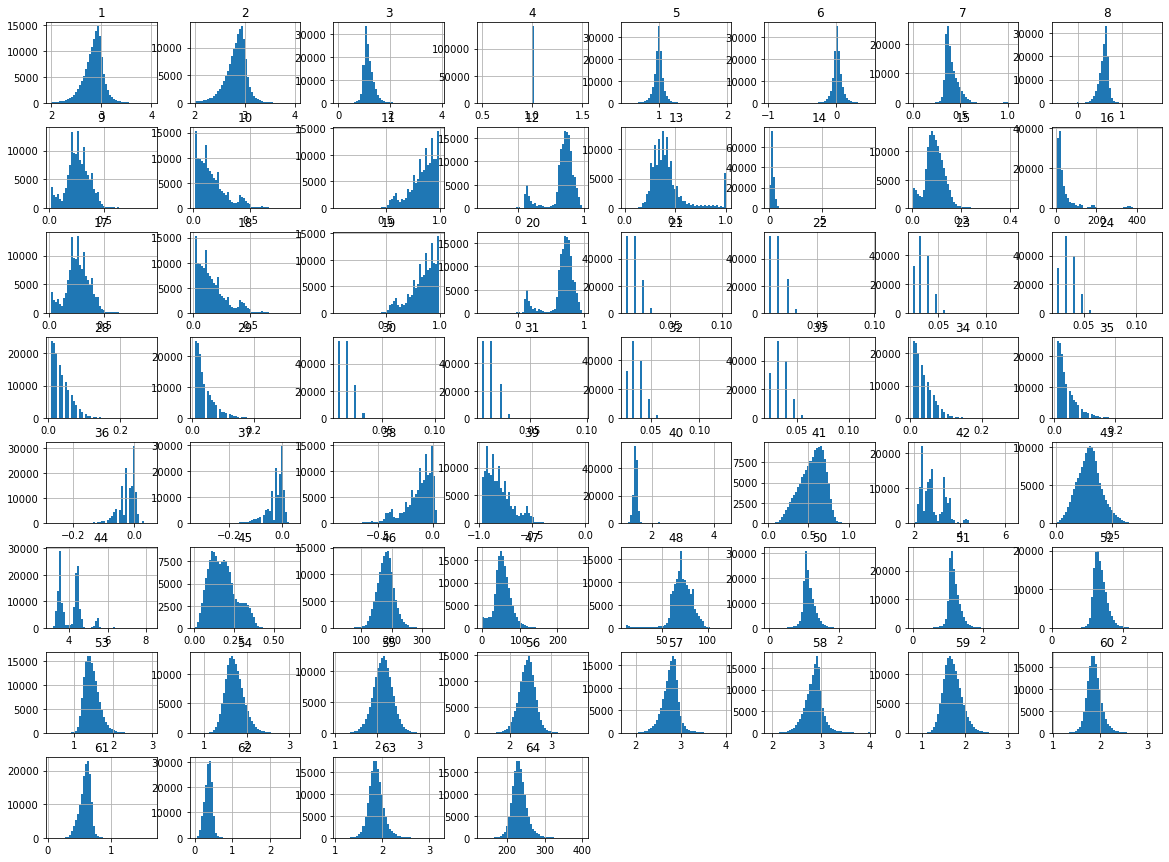

In [14]:
X.hist(bins=50, figsize=(20,15))
plt.show()

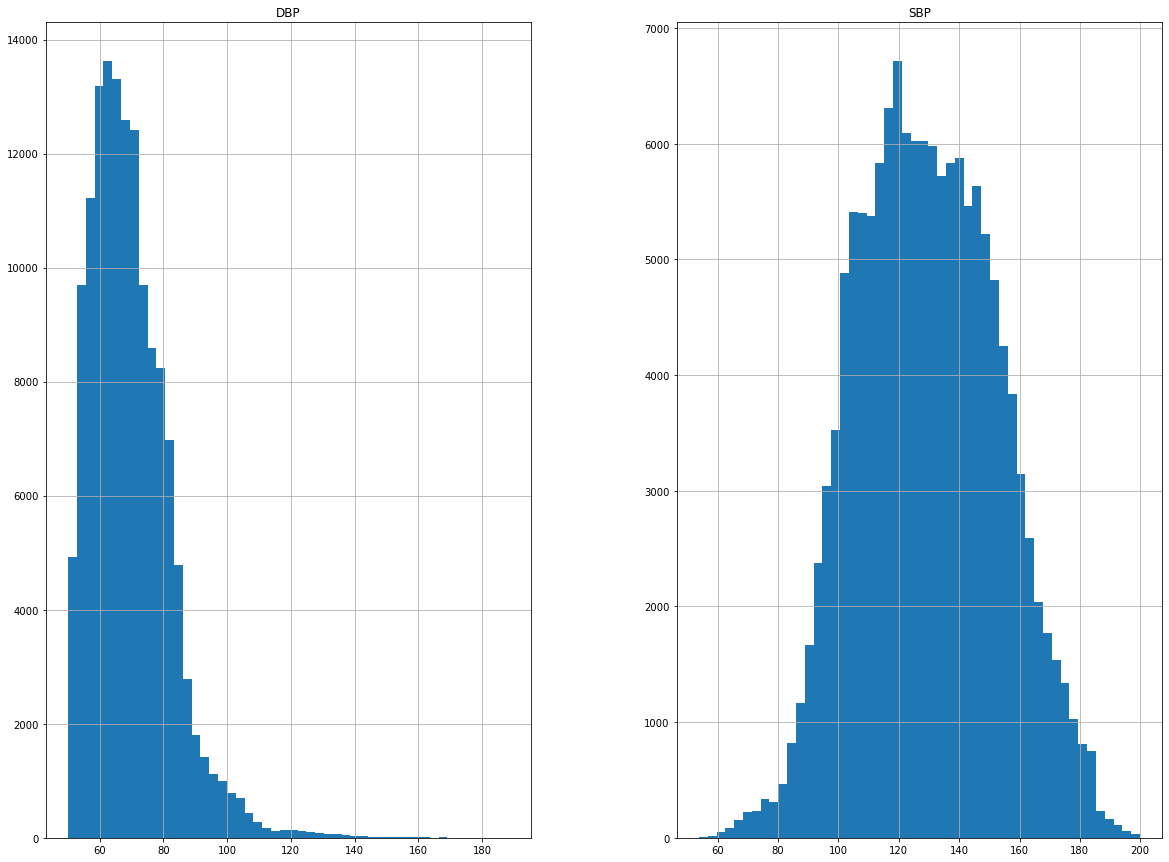

In [15]:
y.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(X)

In [17]:
x.shape


(140816, 60)

In [18]:
y["SBP"]

0         124.601310
1         120.986846
2         122.745234
3         125.187439
4         124.112869
             ...    
140811    108.726976
140812    103.500657
140813    120.107652
140814    106.724368
140815    105.942862
Name: SBP, Length: 140816, dtype: float64

In [26]:
import numpy as np
X_train = x#.to_numpy()
y_train = y["SBP"][np.arange(int(X_train.shape[0]))]

In [27]:
X_train.shape

(140816, 60)

In [28]:
y_train.shape

(140816,)

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import f1_score, roc_auc_score, mean_squared_error, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor)

def create_model(model_type):
    if model_type == 'Random Forest Regressor':
        model = RandomForestRegressor(n_jobs = -1,random_state =33)
    elif model_type == 'XGB Resressor':
        model = xgb.XGBRegressor(n_jobs=-1, random_state=33)
    elif model_type == 'LGBM Resressor':
        model = lgb.LGBMRegressor(n_jobs=-1, random_state=33) 
    elif model_type == 'GradientBoostingRegressor':
        model = GradientBoostingRegressor(random_state=1,max_depth=20,min_samples_split=170, n_estimators=230*2,learning_rate=0.2/2)
    elif model_type == 'AdaBoostRegressor':
        model = AdaBoostRegressor(base_estimator=None,n_estimators=50, learning_rate=5, loss='linear', random_state=33)

In [30]:
import time
def func_cv(model_type, X_train, y_train, cv_itr, n_cv):    
    ix = 0
    dec = 2
    res_acc = np.zeros(n_cv)
    res_pre = np.zeros(n_cv)
    
    for train_ix, test_ix in cv_itr.split(X_train, y_train):
    #     print(X_train[train_ix].shape, y_train[train_ix].shape)
        x_tr, y_tr = X_train[train_ix], y_train[train_ix]
        x_ts, y_ts = X_train[test_ix], y_train[test_ix]

        model = create_model(model_type)
        model.fit(x_tr, y_tr)
        y_pred = model.predict(x_ts)
        
        print('\n\n')
        print(time.strftime('%X %x %Z'))
        print('{0}-cv Errors'.format(ix))        
        print('')
       
        mae = mean_absolute_error(y_ts, y_pred)
        mse = mean_squared_error(y_ts, y_pred)
        mae_round = np.round(mae, dec)      
        mse_round1 = np.round(mse, dec)
        mse_round = np.sqrt(mse_round1)
        
        res_acc[ix] = mae_round
        res_pre[ix] = mse_round
        
        print(f'MAE: {mae_round}, RMSE: {mse_round}')
        print()
        print('-'* 80)
        ix = ix + 1
        
    print('Average Error for 10 k-folds')    
    print('')
    print('MAE:\t {0:.5f}'.format(np.mean(res_acc)))
    print('RMSE:\t {0:.5f}'.format(np.mean(res_pre)))

In [31]:
from sklearn.model_selection import StratifiedKFold, KFold

n_cross_valid = 10
kf = KFold(n_splits=n_cross_valid, shuffle=True, random_state=33)

In [32]:
import sys
import time

org_stdout = sys.stdout
f = open('result_Regression_ML_sbp' + '.txt', 'w')
sys.stdout = f

model_types = ['Random Forest Regressor',
               'XGB Resressor',
               'LGBM Resressor',               
               'GradientBoostingRegressor',
               'AdaBoostRegressor'              
              ]

for model_type in model_types:
    print('\n')
    print('*'*80)
    print('*'*80)
    print(model_type)
    print(time.strftime('%X %x %Z'))
    print('*'*80)
    print('*'*80)
    func_cv(model_type, X_train, y_train, kf, n_cross_valid)
    
f.close()
# sys.stdout.close()
sys.stdout = org_stdout

AttributeError: 'NoneType' object has no attribute 'fit'